# Shift, Scale, Combine

In [2]:
import numpy as np
import astropy
import ccdproc
from ccdproc import CCDData, Combiner
from astropy import units as u
from astropy.visualization import SqrtStretch
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from photutils import centroid_com, centroid_1dg, centroid_2dg
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import Background2D
from photutils import MedianBackground
from scipy.ndimage import shift
import gc                                                           
gc.enable()

### <font color=purple> _Starting with the processed V images_

In [4]:
# Read in the processed images and filter out the V bands
images = ccdproc.ImageFileCollection(".",glob_include='proc_NGC_2808_V_*')
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'. [astropy.wcs.wcs]
Set OBSGEO-Y to  2896022.315 from OBSGEO-[LBH].
Set OBSGEO-Z to -3889419.901 from OBSGEO-[LBH]'.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [5]:
newname=[]
for fn in images.files_filtered(PICTTYPE=1):
    newname.extend(["s"+fn])
print(newname)


['sproc_NGC_2808_V_00002829.fits', 'sproc_NGC_2808_V_00002830.fits', 'sproc_NGC_2808_V_00002831.fits', 'sproc_NGC_2808_V_00002848.fits', 'sproc_NGC_2808_V_00002849.fits', 'sproc_NGC_2808_V_00002850.fits', 'sproc_NGC_2808_V_00002851.fits', 'sproc_NGC_2808_V_00002852.fits', 'sproc_NGC_2808_V_00002853.fits', 'sproc_NGC_2808_V_00002854.fits', 'sproc_NGC_2808_V_00002855.fits', 'sproc_NGC_2808_V_00002856.fits', 'sproc_NGC_2808_V_00002857.fits', 'sproc_NGC_2808_V_00002868.fits', 'sproc_NGC_2808_V_00002869.fits', 'sproc_NGC_2808_V_00002870.fits', 'sproc_NGC_2808_V_00002871.fits', 'sproc_NGC_2808_V_00002872.fits', 'sproc_NGC_2808_V_00002873.fits', 'sproc_NGC_2808_V_00002875.fits', 'sproc_NGC_2808_V_00002876.fits', 'sproc_NGC_2808_V_00002877.fits', 'sproc_NGC_2808_V_00002899.fits', 'sproc_NGC_2808_V_00002901.fits', 'sproc_NGC_2808_V_00002902.fits', 'sproc_NGC_2808_V_00002903.fits', 'sproc_NGC_2808_V_00002904.fits', 'sproc_NGC_2808_V_00002905.fits', 'sproc_NGC_2808_V_00002906.fits', 'sproc_NGC_28

In [6]:
# Using the first processed V band image, a star has been located at coordinates x=1083 y=461


temp=scim[0].copy() #defines temporary file
temp=temp-np.ma.median(temp)

# Determine the centroid - (1083, 461)
x1, y1 = centroid_com(temp[1000:1100,400:500])
print(x1+1083, y1+461)

1120.7532788214335 513.342308164585


In [7]:
xoffset = 401   # x edge of the box 
yoffset = 1023  # y edge of the box
xbox = 60       # comment
ybox = 60       # comment
shiftx=[]        # defines array
shifty=[]        # define array 

for idx, thisimage in enumerate(scim): 
    temp = scim[idx].copy()
    temp =  temp-np.ma.median(temp)
    x1, y1 = centroid_com( temp[yoffset : yoffset + ybox, xoffset : xoffset + xbox])
    print(x1 +xoffset, y1 + yoffset )
    shiftx.append(x1 + xoffset)
    shifty.append(y1 + yoffset )

print(shiftx)   # What is this?
print(shifty)   # What is this?

print(shiftx[0]-shiftx) # calculate the shift in x
print(shifty[0]-shifty) # calculate the shift in y

442.7960120395205 1066.136720785921
442.16814411040866 1066.0356416729308
441.71361242123055 1067.526656752369
442.36206339641313 1065.706065065345
442.93307675536477 1066.5233498834355
443.58184430777186 1066.4031611949777
442.47321266582094 1066.7059154569215
442.93039440596283 1066.9695185015808
442.5248802213606 1066.8837784979244
443.066336731942 1066.6397958423777
443.2784015550081 1066.3448731344527
443.7429920684534 1065.9169958675222
443.73115515611653 1066.4008067909372
443.89447937412035 1065.994099602866
443.88163256544493 1065.988826132378
443.5496807378928 1066.677556576289
443.2918702587794 1066.7218738218244
443.65540437327553 1066.973097264775
443.02837536243584 1066.8330640664265
444.50153415001296 1066.597251050656
443.0204527067165 1066.4705210792258
443.73460176974714 1066.6188812149553
442.1708076815321 1067.720649688266
443.04082914983053 1069.1721025032189
443.84506195712095 1067.3376294768423
441.9638274565777 1068.390641274415
441.6924152005056 1068.6047850490

In [8]:
#implementing shifts for all of the images
shifts=[]
for idx, thisimage in enumerate(scim):
    shiftsval=[-99,-99]
    shiftsval[0]=shiftx[0]-shiftx[idx]
    shiftsval[1]=shifty[0]-shifty[idx]
    shifts.append(shiftsval)

print(shifts)
np.rint(shifts)

[[0.0, 0.0], [0.6278679291118578, 0.10107911299019179], [1.0823996182899691, -1.3899359664480926], [0.4339486431073851, 0.4306557205759418], [-0.13706471584424662, -0.3866290975145148], [-0.7858322682513403, -0.2664404090567132], [0.32279937369958134, -0.5691946710005595], [-0.13438236644230983, -0.8327977156598081], [0.2711318181599154, -0.747057712003425], [-0.27032469242146817, -0.503075056456737], [-0.4823895154875686, -0.20815234853171205], [-0.9469800289328987, 0.2197249183986969], [-0.9351431165960093, -0.2640860050162246], [-1.0984673345998317, 0.14262118305487093], [-1.085620525924412, 0.14789465354283493], [-0.7536686983722802, -0.5408357903679644], [-0.49585821925887785, -0.5851530359034314], [-0.8593923337550109, -0.836376478854163], [-0.2323633229153188, -0.6963432805055163], [-1.7055221104924385, -0.46053026473509817], [-0.22444066719600642, -0.3338002933048756], [-0.9385897302266244, -0.48216042903436573], [0.625204357988423, -1.583928902344951], [-0.2448171103100094, -3

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 1., -1.],
       [ 0.,  0.],
       [-0., -0.],
       [-1., -0.],
       [ 0., -1.],
       [-0., -1.],
       [ 0., -1.],
       [-0., -1.],
       [-0., -0.],
       [-1.,  0.],
       [-1., -0.],
       [-1.,  0.],
       [-1.,  0.],
       [-1., -1.],
       [-0., -1.],
       [-1., -1.],
       [-0., -1.],
       [-2., -0.],
       [-0., -0.],
       [-1., -0.],
       [ 1., -2.],
       [-0., -3.],
       [-1., -1.],
       [ 1., -2.],
       [ 1., -2.],
       [ 1.,  1.],
       [ 0., -2.],
       [-1., -3.]])

In [10]:
xoffset = 1058   # x edge of the box 
yoffset = 436

xbox=50
ybox=50

# creating loop
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0]) # Note the y-x convention being used here and in the following command.
    temp = shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)
    temp=temp-np.ma.median(temp)
    
    # implementing the shifts
    x1, y1 = centroid_com(temp[yoffset:yoffset+ybox,xoffset:xoffset+xbox])
    print(x1+xoffset, y1+yoffset, shifts[idx][0], shifts[idx][1]) 

1078.3757936900668 468.97357719279137 0.0 0.0
1074.8773416165757 472.58584960273953 0.6278679291118578 0.10107911299019179
1076.0538842051078 474.2739373482446 1.0823996182899691 -1.3899359664480926
1074.0217710310806 474.614934530293 0.4339486431073851 0.4306557205759418
1077.8395967937206 471.3384564622101 -0.13706471584424662 -0.3866290975145148
1071.4090053913883 479.7529533369606 -0.7858322682513403 -0.2664404090567132
1074.589161790444 470.5007325814054 0.32279937369958134 -0.5691946710005595
1078.518405770734 468.65078816909397 -0.13438236644230983 -0.8327977156598081
1076.9179278353627 470.5380607900156 0.2711318181599154 -0.747057712003425
1075.044409435185 467.1001881629667 -0.27032469242146817 -0.503075056456737
1076.226921249155 472.2519701022842 -0.4823895154875686 -0.20815234853171205
1068.5847497128018 473.02959249362556 -0.9469800289328987 0.2197249183986969
1072.320851583708 478.5868800492915 -0.9351431165960093 -0.2640860050162246
1075.5365985020926 470.7830665976041 

In [11]:
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0])
    temp = CCDData(shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)-np.ma.median(scim[idx]), unit="adu")
    temp.write(newname[idx])
    


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


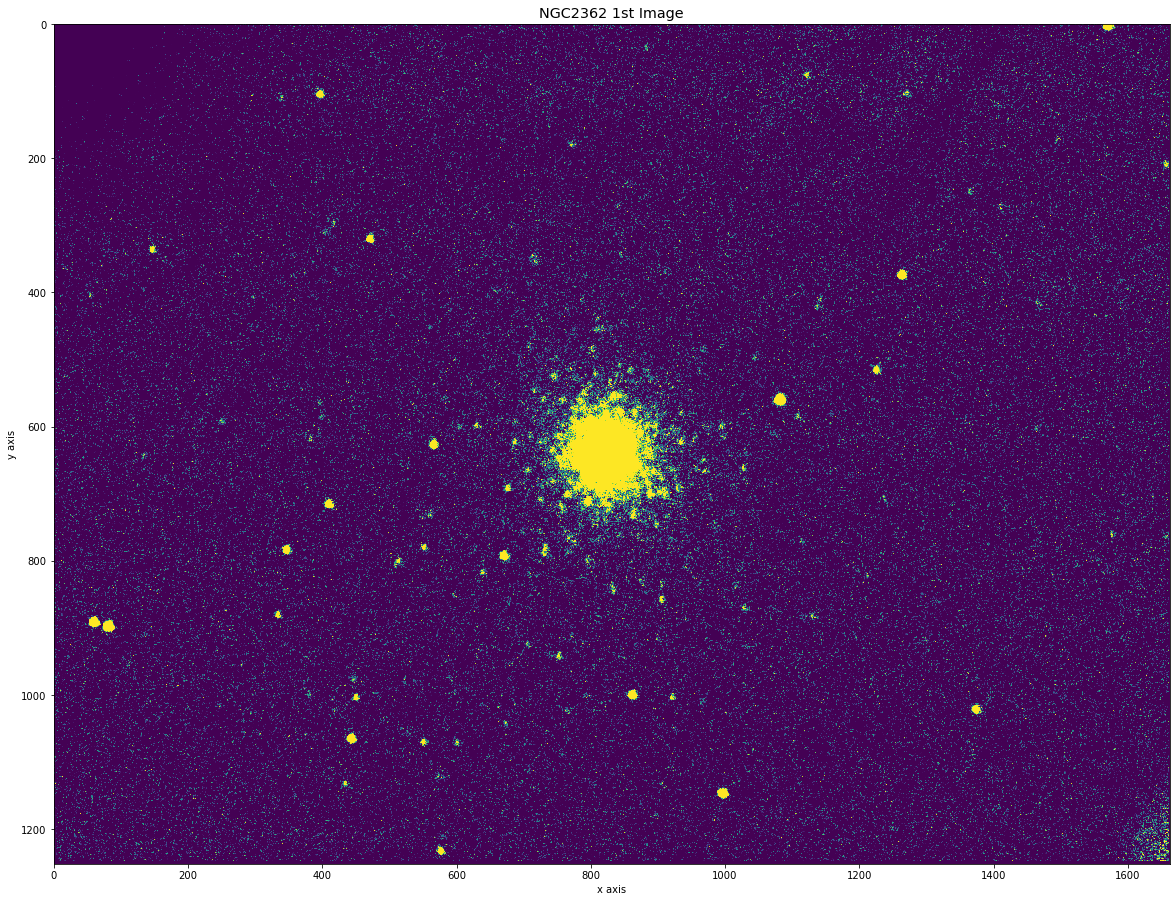

In [13]:
#Printing an image
image_1 = CCDData.read('sproc_NGC_2808_V_00002901.fits', unit="adu")

fig, ax = plt.subplots(figsize = (20,30))
plt.rcParams.update({'font.size': 12 })
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('NGC2362 1st Image')
plt.imshow(image_1, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=1.2e+02, vmax=4.5e+02)



### <font color=purple> _I images_

In [32]:
# Read in the processed images and filter out the I bands
images = ccdproc.ImageFileCollection(".",glob_include='proc_NGC_2808_I_*')
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [33]:
# creating new names for the shifted images
newname=[]
for fn in images.files_filtered(PICTTYPE=1):
    newname.extend(["s"+fn])
print(newname)

['sproc_NGC_2808_I_00002835.fits', 'sproc_NGC_2808_I_00002836.fits', 'sproc_NGC_2808_I_00002838.fits', 'sproc_NGC_2808_I_00002840.fits', 'sproc_NGC_2808_I_00002841.fits', 'sproc_NGC_2808_I_00002843.fits', 'sproc_NGC_2808_I_00002844.fits', 'sproc_NGC_2808_I_00002845.fits', 'sproc_NGC_2808_I_00002846.fits', 'sproc_NGC_2808_I_00002878.fits', 'sproc_NGC_2808_I_00002879.fits', 'sproc_NGC_2808_I_00002880.fits', 'sproc_NGC_2808_I_00002881.fits', 'sproc_NGC_2808_I_00002882.fits', 'sproc_NGC_2808_I_00002883.fits', 'sproc_NGC_2808_I_00002884.fits', 'sproc_NGC_2808_I_00002885.fits', 'sproc_NGC_2808_I_00002887.fits', 'sproc_NGC_2808_I_00002908.fits', 'sproc_NGC_2808_I_00002909.fits', 'sproc_NGC_2808_I_00002910.fits', 'sproc_NGC_2808_I_00002911.fits', 'sproc_NGC_2808_I_00002912.fits', 'sproc_NGC_2808_I_00002913.fits']


In [41]:
# Using the first processed I band image, a star has been located at coordinates x=1083 y=561

temp=scim[0].copy() #defines temporary file
temp=temp-np.ma.median(temp)

# Determine the centroid - (1083, 461)
x1, y1 = centroid_com(temp[1000:1100,500:600])
print(x1+1083, y1+461)

1120.444768775305 494.1001414329662


In [42]:
xoffset = 400   # x edge of the box 
yoffset = 1080  # y edge of the box
xbox = 60       # comment
ybox = 60       # comment
shiftx=[]        # defines array
shifty=[]        # define array 

for idx, thisimage in enumerate(scim): 
    temp = scim[idx].copy()
    temp =  temp-np.ma.median(temp)
    x1, y1 = centroid_com( temp[yoffset : yoffset + ybox, xoffset : xoffset + xbox])
    print(x1 +xoffset, y1 + yoffset )
    shiftx.append(x1 + xoffset)
    shifty.append(y1 + yoffset )

print(shiftx)   # What is this?
print(shifty)   # What is this?

print(shiftx[0]-shiftx) # calculate the shift in x
print(shifty[0]-shifty) # calculate the shift in y

486.3778297357918 1107.8905589124172
486.5671766126813 1107.4670635750022
486.909629124311 1107.9632531381778
487.3945943372409 1108.2263247288547
487.00974978375064 1107.640041864734
486.1752331189301 1108.3861543309456
485.1957453384492 1108.1978679086665
485.5401225813506 1107.058654480869
485.8545220932398 1107.9239151560857
485.492391303034 1108.6582958988872
486.25017340369004 1107.8056444122415
485.92461364660517 1107.7290900379915
486.9043070409585 1108.4605893228286
485.7102925730183 1107.5339468968052
486.35080555104537 1107.4629845950794
485.56957633324845 1107.9856483737633
485.7775936586664 1107.2675942557225
486.60457256316965 1107.6430903832252
486.05095822018944 1108.2329997396228
485.62121904328086 1107.3024734010603
486.01352815691774 1109.330958519505
486.85610780087165 1107.9337878994506
485.9988379764168 1107.8621158493313
485.5838043193984 1106.9360118943641
[486.3778297357918, 486.5671766126813, 486.909629124311, 487.3945943372409, 487.00974978375064, 486.1752331

In [43]:
#implementing shifts for all of the images
shifts=[]
for idx, thisimage in enumerate(scim):
    shiftsval=[-99,-99]
    shiftsval[0]=shiftx[0]-shiftx[idx]
    shiftsval[1]=shifty[0]-shifty[idx]
    shifts.append(shiftsval)

print(shifts)
np.rint(shifts)

[[0.0, 0.0], [-0.1893468768894877, 0.42349533741503365], [-0.5317993885191754, -0.07269422576064244], [-1.016764601449097, -0.33576581643751524], [-0.631920047958829, 0.25051704768316085], [0.2025966168616833, -0.49559541852840994], [1.182084397342578, -0.3073089962492759], [0.8377071544412047, 0.8319044315480824], [0.5233076425520267, -0.03335624366854972], [0.8854384327577804, -0.7677369864700267], [0.12765633210176475, 0.08491450017572788], [0.4532160891866397, 0.16146887442573643], [-0.5264773051666793, -0.5700304104113911], [0.667537162773499, 0.3566120156119723], [0.02702418474643764, 0.42757431733775775], [0.8082534025433574, -0.09508946134610596], [0.6002360771254303, 0.6229646566946485], [-0.2267428273778478, 0.24746852919201956], [0.32687151560236316, -0.34244082720556435], [0.7566106925109466, 0.5880855113568941], [0.36430157887406267, -1.4403996070877838], [-0.4782780650798486, -0.043228987033444355], [0.37899175937502605, 0.028443063085887843], [0.7940254163934242, 0.95454

array([[ 0.,  0.],
       [-0.,  0.],
       [-1., -0.],
       [-1., -0.],
       [-1.,  0.],
       [ 0., -0.],
       [ 1., -0.],
       [ 1.,  1.],
       [ 1., -0.],
       [ 1., -1.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-1., -1.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 1., -0.],
       [ 1.,  1.],
       [-0.,  0.],
       [ 0., -0.],
       [ 1.,  1.],
       [ 0., -1.],
       [-0., -0.],
       [ 0.,  0.],
       [ 1.,  1.]])

In [44]:
xoffset = 490   # x edge of the box 
yoffset = 1197

xbox=50
ybox=50

# creating loop
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0]) # Note the y-x convention being used here and in the following command.
    temp = shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)
    temp=temp-np.ma.median(temp)
    
    # implementing the shifts
    x1, y1 = centroid_com(temp[yoffset:yoffset+ybox,xoffset:xoffset+xbox])
    print(x1+xoffset, y1+yoffset, shifts[idx][0], shifts[idx][1]) 

519.5971817964601 1241.0606220662337 0.0 0.0
519.1772857094808 1244.0720915669463 -0.1893468768894877 0.42349533741503365
516.7545588737963 1241.2452493416104 -0.5317993885191754 -0.07269422576064244
517.2716231148185 1239.9472896166092 -1.016764601449097 -0.33576581643751524
517.327316739003 1237.4879316484414 -0.631920047958829 0.25051704768316085
519.3538264489957 1242.8479181218731 0.2025966168616833 -0.49559541852840994
517.1252310748125 1246.0696551780995 1.182084397342578 -0.3073089962492759
520.3549251621899 1244.258468474404 0.8377071544412047 0.8319044315480824
520.3741657273235 1246.4640015371099 0.5233076425520267 -0.03335624366854972
516.5463559655848 1247.9448279505 0.8854384327577804 -0.7677369864700267
519.0602634712474 1240.2536899537056 0.12765633210176475 0.08491450017572788
518.9200923239346 1240.524062777355 0.4532160891866397 0.16146887442573643
514.7412986394193 1239.4098623616455 -0.5264773051666793 -0.5700304104113911
519.041212796261 1246.7194109331408 0.66753

In [45]:
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0])
    temp = CCDData(shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)-np.ma.median(scim[idx]), unit="adu")
    temp.write(newname[idx])
    

### <font color=purple> _R band shifts_

In [46]:
# Read in the processed images and filter out the R bands
images = ccdproc.ImageFileCollection(".",glob_include='proc_NGC_2808_R_*')
scim = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [47]:
# creating new names for the shifted images
newname=[]
for fn in images.files_filtered(PICTTYPE=1):
    newname.extend(["s"+fn])
print(newname)

['sproc_NGC_2808_R_00002832.fits', 'sproc_NGC_2808_R_00002833.fits', 'sproc_NGC_2808_R_00002834.fits', 'sproc_NGC_2808_R_00002858.fits', 'sproc_NGC_2808_R_00002859.fits', 'sproc_NGC_2808_R_00002860.fits', 'sproc_NGC_2808_R_00002861.fits', 'sproc_NGC_2808_R_00002863.fits', 'sproc_NGC_2808_R_00002864.fits', 'sproc_NGC_2808_R_00002865.fits', 'sproc_NGC_2808_R_00002867.fits', 'sproc_NGC_2808_R_00002888.fits', 'sproc_NGC_2808_R_00002889.fits', 'sproc_NGC_2808_R_00002890.fits', 'sproc_NGC_2808_R_00002891.fits', 'sproc_NGC_2808_R_00002892.fits', 'sproc_NGC_2808_R_00002893.fits', 'sproc_NGC_2808_R_00002894.fits', 'sproc_NGC_2808_R_00002895.fits', 'sproc_NGC_2808_R_00002896.fits', 'sproc_NGC_2808_R_00002897.fits']


In [58]:
# Using the first processed V band image, a star has been located at coordinates x=1083 y=552 

temp=scim[0].copy() #defines temporary file
temp=temp-np.ma.median(temp)

# Determine the centroid - (1083, 461)
x1, y1 = centroid_com(temp[1000:1100,400:500])
print(x1+1083, y1+452)

1125.3050684153159 505.64614423284416


In [59]:
xoffset = 402   # x edge of the box 
yoffset = 1023  # y edge of the box
xbox = 60       # comment
ybox = 60       # comment
shiftx=[]        # defines array
shifty=[]        # define array 

for idx, thisimage in enumerate(scim): 
    temp = scim[idx].copy()
    temp =  temp-np.ma.median(temp)
    x1, y1 = centroid_com( temp[yoffset : yoffset + ybox, xoffset : xoffset + xbox])
    print(x1 +xoffset, y1 + yoffset )
    shiftx.append(x1 + xoffset)
    shifty.append(y1 + yoffset )

print(shiftx)   # What is this?
print(shifty)   # What is this?

print(shiftx[0]-shiftx) # calculate the shift in x
print(shifty[0]-shifty) # calculate the shift in y

445.384995807251 1066.6833207026787
444.9106354969915 1065.9193359323058
444.93114117180636 1067.3338463372788
444.7098290821605 1066.3425026896803
445.5775716725196 1066.3354585472946
446.70439939985636 1066.27554656811
445.1132301387067 1066.7405751708238
445.9976804972119 1066.3999623254972
445.8111096167675 1066.3995262327392
446.75523749866795 1066.8964166373971
446.0209427796538 1066.1687946120223
446.6987958724004 1066.5235230249314
444.5191991703913 1068.2213397595276
445.16941241103405 1066.4815969090773
446.29693692755785 1068.7792882136193
445.5669338668419 1067.6271062001424
445.28142573450566 1066.9218846272834
446.04974398831047 1066.4436247332537
445.7118512645397 1066.45642512804
446.0248269244598 1067.3167649865838
445.80550384918365 1067.1987002194853
[445.384995807251, 444.9106354969915, 444.93114117180636, 444.7098290821605, 445.5775716725196, 446.70439939985636, 445.1132301387067, 445.9976804972119, 445.8111096167675, 446.75523749866795, 446.0209427796538, 446.6987

In [60]:
#implementing shifts for all of the images
shifts=[]
for idx, thisimage in enumerate(scim):
    shiftsval=[-99,-99]
    shiftsval[0]=shiftx[0]-shiftx[idx]
    shiftsval[1]=shifty[0]-shifty[idx]
    shifts.append(shiftsval)

print(shifts)
np.rint(shifts)

[[0.0, 0.0], [0.4743603102594989, 0.7639847703728719], [0.45385463544465665, -0.6505256346001715], [0.6751667250904916, 0.34081801299839753], [-0.19257586526856585, 0.34786215538406395], [-1.3194035926053402, 0.4077741345686263], [0.27176566854433304, -0.05725446814517454], [-0.6126846899608722, 0.2833583771814574], [-0.4261138095164938, 0.28379446993949387], [-1.3702416914169362, -0.2130959347184671], [-0.6359469724027917, 0.514526090656318], [-1.313800065149394, 0.15979767774729225], [0.8657966368597272, -1.5380190568489525], [0.21558339621697087, 0.20172379360133164], [-0.9119411203068353, -2.0959675109406817], [-0.18193805959089104, -0.9437854974637503], [0.1035700727453559, -0.23856392460470488], [-0.6647481810594513, 0.239695969424929], [-0.3268554572886728, 0.22689557463854726], [-0.6398311172087574, -0.6334442839051917], [-0.420508041932635, -0.5153795168066608]]


array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0., -1.],
       [ 1.,  0.],
       [-0.,  0.],
       [-1.,  0.],
       [ 0., -0.],
       [-1.,  0.],
       [-0.,  0.],
       [-1., -0.],
       [-1.,  1.],
       [-1.,  0.],
       [ 1., -2.],
       [ 0.,  0.],
       [-1., -2.],
       [-0., -1.],
       [ 0., -0.],
       [-1.,  0.],
       [-0.,  0.],
       [-1., -1.],
       [-0., -1.]])

In [61]:
xoffset = 1205   # x edge of the box 
yoffset = 492

xbox=50
ybox=50

# creating loop
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0]) # Note the y-x convention being used here and in the following command.
    temp = shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)
    temp=temp-np.ma.median(temp)
    
    # implementing the shifts
    x1, y1 = centroid_com(temp[yoffset:yoffset+ybox,xoffset:xoffset+xbox])
    print(x1+xoffset, y1+yoffset, shifts[idx][0], shifts[idx][1]) 

1227.6095594517762 516.5089787247542 0.0 0.0
1226.5495432865193 516.2686684740019 0.4743603102594989 0.7639847703728719
1226.8641757979153 515.8286228772862 0.45385463544465665 -0.6505256346001715
1227.6802989495554 516.0073511976738 0.6751667250904916 0.34081801299839753
1227.8691398143933 516.3147439680906 -0.19257586526856585 0.34786215538406395
1227.975713896101 515.9057112750401 -1.3194035926053402 0.4077741345686263
1227.467215099535 516.8729032402136 0.27176566854433304 -0.05725446814517454
1226.7538619195054 515.7739342088489 -0.6126846899608722 0.2833583771814574
1227.6784156195868 515.9573887582029 -0.4261138095164938 0.28379446993949387
1227.3471145332626 516.5443692943561 -1.3702416914169362 -0.2130959347184671
1226.93323304474 516.3424788655888 -0.6359469724027917 0.514526090656318
1227.3184085117775 515.0889372822804 -1.313800065149394 0.15979767774729225
1226.2895100541505 514.2314956369155 0.8657966368597272 -1.5380190568489525
1227.1912408047451 516.2352531683376 0.215

In [62]:
for idx, thisimage in enumerate(scim): 
    yxshifts=(shifts[idx][1], shifts[idx][0])
    temp = CCDData(shift(scim[idx], yxshifts, order=0, mode='constant', cval=-1000)-np.ma.median(scim[idx]), unit="adu")
    temp.write(newname[idx])